<a href="https://colab.research.google.com/github/listpplo/tensorflow_learning/blob/main/01__tensorFLow_reggration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Neural Network Regression with TensorFlow**

In [ ]:
    """import tensorflow"""
    import tensorflow as tf

In [ ]:
# Setiing the seed makes the tensor generation predictable
tf.random.set_seed(43)
print(tf.random.uniform(shape = (2,3),seed = 23))
print(tf.random.uniform(shape = (2,3),seed =23))     


tf.Tensor(
[[0.2958901  0.648312   0.09882522]
 [0.6331359  0.9217684  0.6511483 ]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[0.51106966 0.30130255 0.12281215]
 [0.26824522 0.0577774  0.64826405]], shape=(2, 3), dtype=float32)


> Regression means simply prediciting the number

> Regression : A regression is a statistical technique that relates a dependent variable to one or more independent (explanatory) variables.

input_features --> Machine Learning Algorithm --> Output_Features

Determining the price of the house for the given data


For Input_Features = [ BedRooms , BathRooms , Garages]     ---> Shape = 3


For Output_Features = [Price]                              ---> Shape = 1


# Anantomy of Neural Network

Input_Features  ---> *Input_Layers* (Data gets input here) ---> *Hidden Layers* (Learns patterns in the the data) ---> *Output layer* (Output learned representation or predicition probability)


# Crating a Regression data for our project

> **Introduction to Regression with Neural network in TensorFLow**

Trying to predict the numerical values based on some other combination of variables.

In [ ]:
# checking the version of TensorFLow 
print(tf.__version__)

2.9.2


13
13


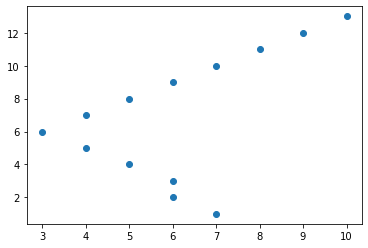

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Creating features 
X = np.array([7,6,6,5,4,3,4,5,6,7,8,9,10])

print(len(X))

# Creating labels
Y = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13])

print(len(Y))

# ploting X and Y
plt.scatter(X,Y);

> **Input and Output shapes**

In [ ]:
# create a demo tensor for our house price prediction problem 

house_info = tf.constant(["bedRoom","BathRoom","garage"])
house_price = tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedRoom', b'BathRoom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
Input_Shape = X.shape
Output_Shape = Y.shape

Input_Shape, Output_Shape

((13,), (13,))

> For this problem we are looking for scaler i.e. 0 dimensional tensor

In [ ]:
# Turning the numpy arrays into tensors

X = tf.constant(X)
Y = tf.constant(Y)

X,Y

(<tf.Tensor: shape=(13,), dtype=int64, numpy=array([ 7,  6,  6,  5,  4,  3,  4,  5,  6,  7,  8,  9, 10])>,
 <tf.Tensor: shape=(13,), dtype=int64, numpy=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])>)

### Steps in modelling in tensorflow

1. Creating a model --> Defining the input, Output and hidden layers in deep learning model.

2. Compiling a model --> defining a **loss function**(How accurate our model is),a **optimizer**(tells out model how to impeove the learning patterns) and a **evualtion metrics**(How we can inteprete the performanace of our model).

3. FItting the model --> letting the model try to find patterns between X and Y(Features and lab)

> When We create the model we always compile it.

In [ ]:
# Setting the random seed 
tf.random.set_seed(42)

#1. creating the model using TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)   # Dense function gives the number of neurons in the layer

])

#2. compiling the model
model.compile(loss =tf.keras.losses.mae,    # mae  --> Mean absolute error
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

#3. Fit the model

model.fit(tf.expand_dims(X,axis = -1),Y, epochs = 10)

Epoch 1/10
1/1 [==============================] - 1s 555ms/step - loss: 4.2352 - mae: 4.2352
Epoch 2/10
1/1 [==============================] - 0s 17ms/step - loss: 4.1279 - mae: 4.1279
Epoch 3/10
1/1 [==============================] - 0s 13ms/step - loss: 4.0206 - mae: 4.0206
Epoch 4/10
1/1 [==============================] - 0s 7ms/step - loss: 3.9134 - mae: 3.9134
Epoch 5/10
1/1 [==============================] - 0s 8ms/step - loss: 3.8061 - mae: 3.8061
Epoch 6/10
1/1 [==============================] - 0s 10ms/step - loss: 3.6988 - mae: 3.6988
Epoch 7/10
1/1 [==============================] - 0s 8ms/step - loss: 3.5915 - mae: 3.5915
Epoch 8/10
1/1 [==============================] - 0s 15ms/step - loss: 3.4871 - mae: 3.4871
Epoch 9/10
1/1 [==============================] - 0s 9ms/step - loss: 3.4251 - mae: 3.4251
Epoch 10/10
1/1 [==============================] - 0s 16ms/step - loss: 3.3630 - mae: 3.3630


In [ ]:
# Checking X and Y
X, Y

(<tf.Tensor: shape=(13,), dtype=int64, numpy=array([ 7,  6,  6,  5,  4,  3,  4,  5,  6,  7,  8,  9, 10])>,
 <tf.Tensor: shape=(13,), dtype=int64, numpy=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])>)

In [ ]:
# try and predict with our model
y_pred = model.predict([10])
y_pred

# The value we get are far off from the data 

1/1 [==============================] - 0s 109ms/step


array([[8.749829]], dtype=float32)

# Improving Our model

We can improve our model by :  
1. **Creating a model** -->  add more layers , increasing the number of hidden units(all called neurons) within each of the hidden layers, change activation of each layers. 

2. **Compiling the model** --> We can change the optimizing function or perhaps the **learning rate** of the optimizing stage.

3. **Fitting the model** --> We can make make the model train for longer or give the model more data to train upon.

Metrices --> Humar interperatble model representing that how weel the model is doing. 

Epochs --> how may times the model will go through the traning.

Loss --> How wrong the model predictions are compared to the truth tables(Lower the better).

> We define a smaller model to make sure that our data works, This will help us to save time before going to a laregr model.


In [ ]:
# Let's Rebuid our model

# 1. create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model.compile(loss = "mae",
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. fitting the model

model.fit(tf.expand_dims(X, -1),Y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 537ms/step - loss: 3.9741 - mae: 3.9741
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 3.8668 - mae: 3.8668
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 3.7595 - mae: 3.7595
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 3.6523 - mae: 3.6523
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 3.5450 - mae: 3.5450
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 3.4514 - mae: 3.4514
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 3.3893 - mae: 3.3893
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 3.3273 - mae: 3.3273
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 3.2652 - mae: 3.2652
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 3.2031 - mae: 3.2031
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 3.

> Just changing the epochs we have improved the accuracy of the model.

>previous loss = 6.475 --> current loss = 2.27

In [ ]:
# The data I provided 

X, Y

(<tf.Tensor: shape=(13,), dtype=int64, numpy=array([ 7,  6,  6,  5,  4,  3,  4,  5,  6,  7,  8,  9, 10])>,
 <tf.Tensor: shape=(13,), dtype=int64, numpy=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])>)

In [ ]:
model.predict([3])

1/1 [==============================] - 0s 69ms/step


array([[4.0664673]], dtype=float32)

>The system returns the value which is just equal to the current value minus the error 

> **Now we can see the effect of changing the number of neurons inside the neural network**

In [ ]:
# Model with more number of neurons 

# 1. Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),  
])

# 2. compiling the model
model.compile(loss = "mae",
              optimizer = tf.keras.optimizers.SGD(lr = 0.01),
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,-1),Y, epochs= 100)

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 385ms/step - loss: 3.4034 - mae: 3.4034
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 3.3413 - mae: 3.3413
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 3.2792 - mae: 3.2792
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 3.2172 - mae: 3.2172
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 3.1551 - mae: 3.1551
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 3.0930 - mae: 3.0930
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 3.0310 - mae: 3.0310
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 2.9689 - mae: 2.9689
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 2.9068 - mae: 2.9068
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 2.8448 - mae: 2.8448
Epoch 11/100
1/1 [==============================] - 0s 11ms/step - loss: 2.7827 - m

> We can see by increasing the layers the the  my mean absolute error is increasing in this case ,so every change in the model dosen't lead to improvement in the model.

The metrices we see are not really representative of what the mdoel is going to predict.

> We predict the accuracy of the model by using to predict the data that the model have not seen till now.

> That is by dividing the data into two groups one for traning and one for predcicting.

**Common way of improving the model :**
1. By adding more layers 
2. increasing the number of hidden layers
3. Changing the activation function
4. Changing the optimizer function 
5. Changing the learning rate 
6. Fitting on more data 
7. Fitting to longer (larger number of epochs)

the learning rate is the most important hyper parameter

## **Evaluating a Model**
```
In practice a typical workflow :
Build a model --> fit it --> evaluate it --> tweak a model --> fit it --> evaluate it --> tweak a model --> evaluate it.......```

Hyperparameter are the nobs that we can adjust to optimize the learnig of the model.

Parameter are those patterns that the model learn from the data 

When it comes to evaluation ... there are 3 words to memorise :

> "Visualise, visualise , visualise"

This to visulaise :
1. The data that we are working with 
2. model it self -- what does our model look like
3. The traning of a model - how does the model perform while it learns ?
4. The predictions of the model - how the model predict against the ground truth.



In [ ]:
# making a bigger dataset
x= tf.range(-100,100,4)
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# making the label for our model

y= x+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

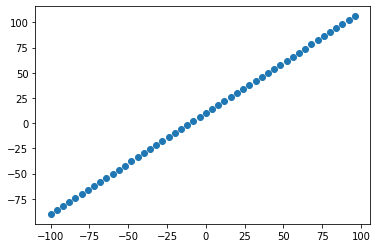

In [ ]:
#ploting the data

import matplotlib.pyplot as plt

plt.scatter(x,y)

### The concept of three sets 

* Traning set -- The model learns on this tyoe of data about 70-80% of the data 

* Validation set -- The model get tuned on this set , which is typically 10-15% of the data available.

* Test Set -- The model get evaluated on this set , this set is typically 10-15 percent of the total data available.


In [ ]:
# Check the length of how many data we are working on

len(x)

50

In [ ]:
# Split the data into train and test sets 
x_train = x[:40]       # We want the first 40 data as we are working with 50 data 
y_train = y[:40]

x_test = x[40:]        # the last 10 traning samples
y_test= y[40:]

print(x_train)
print("")
print(x_test)

tf.Tensor(
[-100  -96  -92  -88  -84  -80  -76  -72  -68  -64  -60  -56  -52  -48
  -44  -40  -36  -32  -28  -24  -20  -16  -12   -8   -4    0    4    8
   12   16   20   24   28   32   36   40   44   48   52   56], shape=(40,), dtype=int32)

tf.Tensor([60 64 68 72 76 80 84 88 92 96], shape=(10,), dtype=int32)


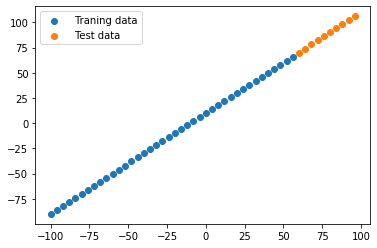

In [ ]:
from prompt_toolkit.shortcuts.dialogs import Label
# Visualising the data 

plt.scatter(x_train,y_train, label =" Traning data")    #learn learning data  on
plt.scatter(x_test, y_test, label = " Test data") #predict on the testing data

plt.legend();


In [ ]:
# make a model to predict the above value

# 1. creating a model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(lr = 0.01),
              metrics = ["mae"])

#3 fitting the data 
#model.fit(tf.expand_dims(x_train,-1),y_train, epochs =100)

> ## Visualising the model

In [ ]:
model.summary()

ValueError: ignored

In [ ]:
# Making another model with input shape
tf.random.set_seed(42)
#1. making a model with input shape 

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = [1] ),   # the input shape will be 1 because we are taking one number for  predicting one number
    tf.keras.layers.Dense(4)])

#2. compiling the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])


#Fully connected layers is also known as Dense layers
#


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
 dense_4 (Dense)             (None, 4)                 8         
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


* Total number parameters are the total number of relations that my model will try to learn form the data.
* Trananble parameters --> These are parameters (pattersns) the model can update as it trains.
* Non tainable para --> These are the parameters that aren't updated during the traning (These come from the transfer learning i.e. the previously learned patters)



📚 **Resource** --> MIT introduction to deep learning 

**Extercise** -- > change the number of hidden layers in the dense layers and observe the change in the learning parametrs.

In [ ]:
model.fit(x_train, y_train,epochs=100,verbose=1)

In [ ]:
# we can use plot model function to visualise the model

form tensorflow.keras.utils import plot_model

plot_model()

In [50]:
import tensorflow as tf 

x = list()
#creating data for the modle to fit 
for i in range(0,100):
  x.append(i)


y = list()
for i in range(0,len(x)):
  y.append(x[i]+ 5)

print(x)
print(y)
print()
print()
# seprating the data sets into traning data and testing data
#traning data
x_train =tf.constant(x[:40])
y_train =tf.constant(y[:40])

#testing data
x_test = tf.constant(x[41:])
y_test = tf.constant(y[41:]) 

#1 creating the model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]),
    tf.keras.layers.Dense(3)       #we need to define the shapes for the model to get build properly
])

#2. compiling the model

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics = ["mae"])
#3 fitting the model 

model.fit(x_train, y_train, epochs = 100)

print("************************************************************")
type(model)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104]


Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 33.9620 - mae: 33.9620
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 26.6422 - mae: 26.6422
Epoch 3/100
2/2 [=

keras.engine.sequential.Sequential

In [34]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


By increasing the learning rate the efectiveness of the modle decreases , the modle ties to learn a lot faster Nd overshoots the predicted values.